<a href="https://colab.research.google.com/github/Dhanno08/Scaler-Projects/blob/main/Swiggy_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv("swiggy.csv")

In [8]:
df.head(10)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150.0,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57
8,267,Domlur,Bangalore,Tea Brew,350.0,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57
9,308,Koramangala,Bangalore,Bangaliana,300.0,4.0,500,Bengali,7Th Block,57


In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(8680, 10)

In [11]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [12]:
df.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [13]:
df.count()

ID               8680
Area             8680
City             8680
Restaurant       8680
Price            8680
Avg ratings      8680
Total ratings    8680
Food type        8680
Address          8680
Delivery time    8680
dtype: int64

In [14]:
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [16]:
df.nunique()

ID               8680
Area              833
City                9
Restaurant       7865
Price             120
Avg ratings        30
Total ratings       8
Food type        3734
Address          2339
Delivery time      81
dtype: int64

In [17]:
nunique_values = {}  # Create a dictionary to store unique values for each column

for column in df.columns:
    nunique_values[column] = df[column].nunique()

# Print unique values for each column
for column, values in nunique_values.items():
    print(f"Unique values in {column}:" , values)
    print()

Unique values in ID: 8680

Unique values in Area: 833

Unique values in City: 9

Unique values in Restaurant: 7865

Unique values in Price: 120

Unique values in Avg ratings: 30

Unique values in Total ratings: 8

Unique values in Food type: 3734

Unique values in Address: 2339

Unique values in Delivery time: 81



In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8680.0,244812.071429,158671.617188,211.0,72664.0,283442.0,393425.25,466928.0
Price,8680.0,348.444470,230.940074,0.0,200.0,300.0,400.00,2500.0
Avg ratings,8680.0,3.655104,0.647629,2.0,2.9,3.9,4.20,5.0
Total ratings,8680.0,156.634793,391.448014,20.0,50.0,80.0,100.00,10000.0
Delivery time,8680.0,53.967051,14.292335,20.0,44.0,53.0,64.00,109.0


In [19]:
df.describe(include="object").T

,count,unique,top,freq
Area,8680,833,Rohini,257
City,8680,9,Kolkata,1346
Restaurant,8680,7865,La Pino'Z Pizza,13
Food type,8680,3734,Indian,389
Address,8680,2339,Rohini,229


Question on which I have worked on

1)What is the average price of food across all restaurants?

2)Which restaurant has the highest average rating?

3)Which restaurant has the lowest average rating?

4)How does average rating correlate with the price?

5)Which area has the most number of restaurants?

6)Which city has the most number of restaurants?

7)What is the average delivery time across all orders?

8)Which food type is the most popular based on total ratings?

9)Are restaurants with higher prices likely to have higher ratings?

10)Which restaurant has the slowest average delivery time?

11)Are restaurants with faster delivery times more highly rated?

12)How does the number of food types offered correlate with average ratings?

13)Which restaurant offers the most food types?

14)Which area in Bangalore has the highest average restaurant rating?

15)Which area in Bangalore has the most diverse food type options?

16)What is the average price of Biryani across all restaurants?

17)Which restaurants in Indiranagar offer Tandoor?

18)How many restaurants in Bangalore offer both North Indian and Chinese cuisine?

19)Which restaurants have the highest total ratings but a low average rating?

20)Do higher-priced restaurants have a wider range of food types?

In [20]:
# 1. What is the average price of food across all restaurants?

AVG_price= df['Price'].mean()
AVG_price.round(2)

348.44

In [21]:
# 2. Which restaurant has the highest average rating?

highest_rating= df.groupby("Restaurant")['Avg ratings'].mean().sort_values(ascending= False)
highest_rating.head(1)

Restaurant
Diamond Market Pizza Jp    5.0
Name: Avg ratings, dtype: float64

In [22]:
# Top 3 restarant
highest_rating.head(3)

Restaurant
Diamond Market Pizza Jp                 5.0
Get In My Belly                         5.0
Splurge - Thickshakes And Milkshakes    5.0
Name: Avg ratings, dtype: float64

In [23]:
# 3. Which restaurant has the lowest average rating?
highest_rating= df.groupby("Restaurant")['Avg ratings'].mean().sort_values(ascending= True)
highest_rating.head(1)

Restaurant
Golden Dragon Chinese & Momo    2.0
Name: Avg ratings, dtype: float64

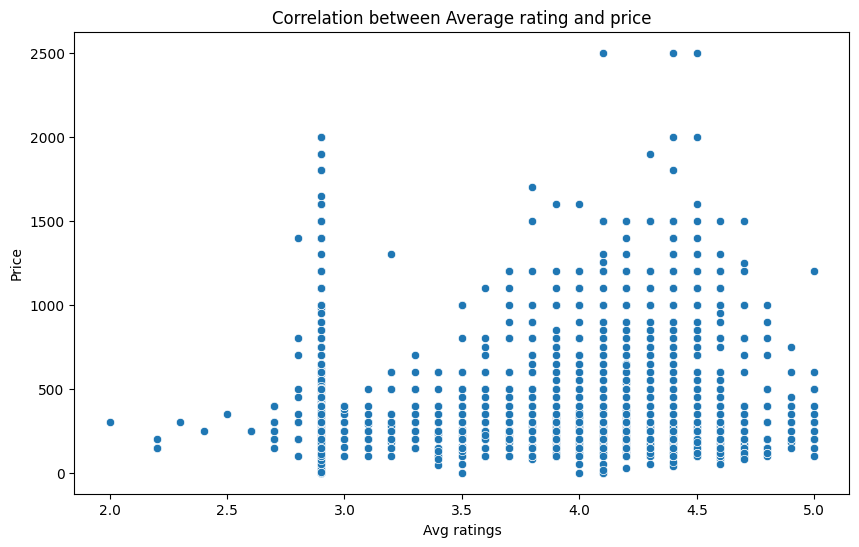

In [24]:
#4. How does average rating correlate with the price?
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Avg ratings"],y=df["Price"],data=df)
plt.title("Correlation between Average rating and price")
plt.show()

In [48]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(df, x='Price', y='Avg ratings', title='Correlation Between Restaurant Price and Average Rating', color_discrete_sequence=['red'])
fig.update_layout(template="plotly_dark")

fig.show()

In [25]:
#5. Which area has the most number of restaurants?
df.groupby("Area")['Restaurant'].count().sort_values(ascending= False).head(1)

Area
Rohini    257
Name: Restaurant, dtype: int64

In [54]:
# 6. Which city has the most number of restaurants?
df.groupby("City")['Restaurant'].count().sort_values(ascending=False).head(1)

City
Kolkata    1346
Name: Restaurant, dtype: int64

In [26]:
#7. What is the average delivery time across all orders?
a_d_t= df['Delivery time'].mean()
a_d_t.round(2)

53.97

In [31]:
#8. Which food type is the most popular based on total ratings?


# Create a copy of the 'Food type' and 'Total ratings' columns
food_ratings_df = df[['Food type', 'Total ratings']].copy()

# Split the 'Food type' column into a list of food types
food_ratings_df['Food type'] = food_ratings_df['Food type'].str.split(',')

# Explode the 'Food type' column to have one food type per row
food_ratings_df = food_ratings_df.explode('Food type')

# Group by 'Food type' and sum the total ratings for each type
food_type_ratings = food_ratings_df.groupby('Food type')['Total ratings'].sum()

# Find the food type with the highest total ratings
most_popular_food_type = food_type_ratings.idxmax()
total_ratings_highest = food_type_ratings.max()

print(f"The most popular food type based on total ratings is - {most_popular_food_type} with {total_ratings_highest} total ratings.")

The most popular food type based on total ratings is - Chinese with 525080 total ratings.


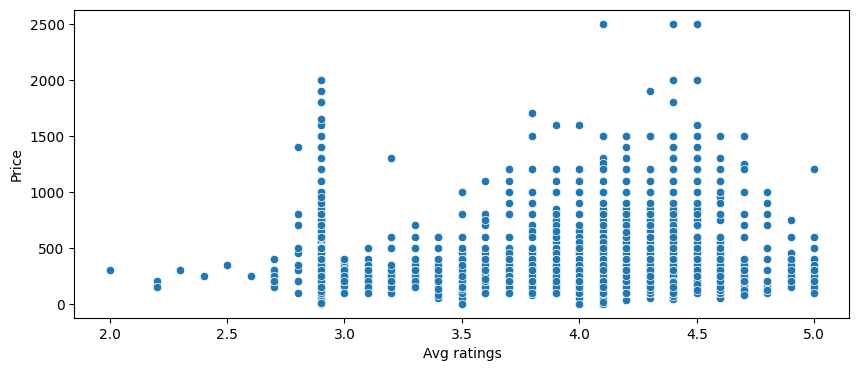

In [32]:
# 9) Are restaurants with higher prices likely to have higher ratings?
plt.figure(figsize= (10,4))
sns.scatterplot(x= df['Avg ratings'], y=df['Price'], data= df)
plt.show()

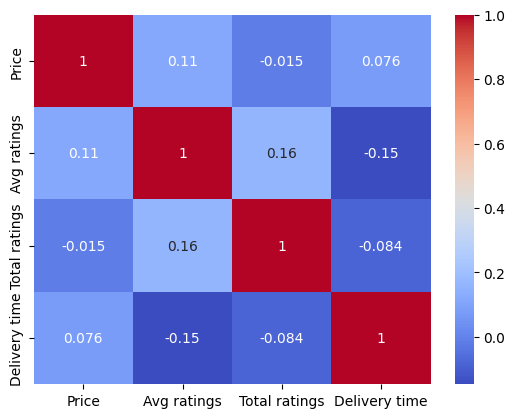

In [33]:
df3=df[["Price","Avg ratings","Total ratings","Delivery time"]]
corr=df3.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [34]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [35]:
# 10)Which restaurant has the slowest average delivery time?
df.groupby("Restaurant")['Delivery time'].mean().sort_values(ascending= True).head(1)

Restaurant
Wah Ji Wah ( Budhvihar)    21.0
Name: Delivery time, dtype: float64

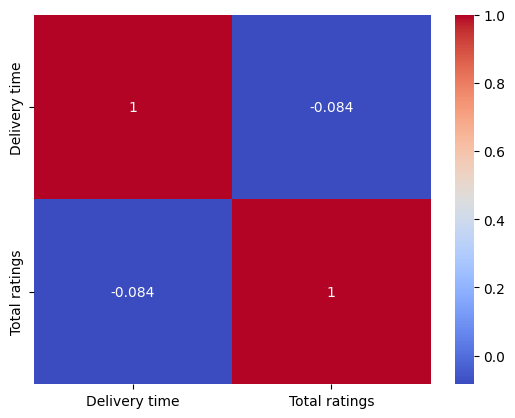

In [36]:
#11) Are restaurants with faster delivery times more highly rated?
df4= df[['Delivery time','Total ratings']]
corr= df4.corr()
sns.heatmap(corr, annot= True, cmap= 'coolwarm')
plt.show()

In [37]:
#12)How does the number of food types offered correlate with average ratings?
import pandas as pd


df1 = df['Food type'].str.split(',')
df['Number of Food Types'] = df1.apply(len)

# Calculate the correlation between 'Number of Food Types' and 'Avg ratings'
correlation = df['Number of Food Types'].corr(df['Avg ratings'])

print(f"The correlation between the number of food types and average ratings is: {correlation:.2f}")



The correlation between the number of food types and average ratings is: 0.14


In [38]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Number of Food Types
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,4
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,2
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,1
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,4
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,8


In [39]:
#13)Which restaurant offers the most food types?

restaurant_with_most_food_types = df[df['Number of Food Types'] == df['Number of Food Types'].max()]

# Display the result
print("The restaurant(s) with the most food types:")
print(restaurant_with_most_food_types[['Restaurant', 'Number of Food Types']])

The restaurant(s) with the most food types:
            Restaurant  Number of Food Types
2268  The Bowl Company                    23
5060  The Bowl Company                    23


In [57]:
#14. Which area in Bangalore has the highest average restaurant rating?
restaurants_df = df

# Filter the data for Bangalore
bangalore_data = restaurants_df[restaurants_df['City'] == 'Bangalore']

# Group by Area and calculate the average rating for each area
average_ratings_by_area = bangalore_data.groupby('Area')['Avg ratings'].mean()

# Find the area with the highest average rating
highest_rated_area = average_ratings_by_area.idxmax()
highest_average_rating = average_ratings_by_area.max()

print(f"The area in Bangalore with the highest average restaurant rating is '{highest_rated_area}' with an average rating of {highest_average_rating:.2f}.")

The area in Bangalore with the highest average restaurant rating is 'Viveka Nagar' with an average rating of 4.60.


In [58]:
#15. Which area in Bangalore has the most diverse food type options?
bangalore_data = restaurants_df[restaurants_df['City'] == 'Bangalore']

# Group by Area and count unique food types for each area
food_type_counts_by_area = bangalore_data.groupby('Area')['Food type'].apply(lambda x: len(set(','.join(x).split(','))))

# Find the area with the most diverse food type options
most_diverse_area = food_type_counts_by_area.idxmax()
num_unique_food_types = food_type_counts_by_area.max()

print(f"The area in Bangalore with the most diverse food type options is '{most_diverse_area}' with {num_unique_food_types} unique food types.")

The area in Bangalore with the most diverse food type options is 'Indiranagar' with 66 unique food types.


In [59]:
#16. What is the average price of Biryani across all restaurants?
# Filter the data for restaurants that offer Biryani
biryani_data = restaurants_df[restaurants_df['Food type'].str.contains('Biryani', case=False, na=False)]

# Calculate the average price of Biryani across all restaurants
average_biryani_price = biryani_data['Price'].mean()

print(f"The average price of Biryani across all restaurants is {average_biryani_price:.2f}.")

The average price of Biryani across all restaurants is 376.73.


In [60]:
# 17. Which restaurants in Indiranagar offer Tandoor?
df[(df["Area"]=="Indiranagar") & (df["Food type"].str.contains("Tandoor"))]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Number of Food Types
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,4
442,18464,Indiranagar,Bangalore,Fresh Bites,200.0,4.1,500,"North Indian,South Indian,Chinese,Fast Food,Ju...",Indiranagar Double Road,53,6
526,21404,Indiranagar,Bangalore,Dhaba Estd 1986 Delhi,900.0,4.2,100,"Biryani,Hyderabadi,North Indian,Indian,Tandoor...",12Th Main,58,6
2049,170538,Indiranagar,Bangalore,Side Dish,200.0,4.0,20,"Tandoor,North Indian,Chinese,Snacks,Beverages,...",Indiranagar Double Road,53,6
2455,230976,Indiranagar,Bangalore,The Biryani Experiment,500.0,3.9,100,"Biryani,Hyderabadi,Indian,Kebabs,North Indian,...",Indiranagar,52,18
3136,311202,Indiranagar,Bangalore,Andhra Biryanis,400.0,4.2,100,"Andhra,Biryani,Hyderabadi,Chinese,Tandoor",Indiranagar,54,5
3774,351183,Indiranagar,Bangalore,Responsible Biryani,450.0,4.2,50,"Biryani,North Indian,Mughlai,Tandoor,Kebabs",Hal 2Nd Stage,55,5
4726,395605,Indiranagar,Bangalore,Tandoor And Tadka,250.0,3.8,50,"North Indian,Tandoor,Chinese",Indiranagar,59,3
8336,412597,Indiranagar,Bangalore,Babaji Bites,250.0,2.9,80,"Chinese,Tandoor",Indiranagar,59,2


In [61]:
# 18. How many restaurants in Bangalore offer both North Indian and Chinese cuisine?
df[(df["City"]=="Bangalore" )& (df["Food type"].str.contains("North Indian"))& (df["Food type"].str.contains("Chinese"))].shape[0]

117

In [62]:
# 19. Which restaurants have the highest total ratings but a low average rating?
sorted_restaurants = df.sort_values(by=['Total ratings', 'Avg ratings'], ascending=[False, True])

# Print the restaurants with the highest total ratings but low average rating
print("Restaurants with the highest total ratings but low average rating:")
print(sorted_restaurants[['Restaurant', 'Total ratings', 'Avg ratings']].head())

# Note: You can adjust the number of restaurants displayed by changing the value in the head() method.

Restaurants with the highest total ratings but low average rating:
                         Restaurant  Total ratings  Avg ratings
95                           Mehfil          10000          3.9
106                        Bawarchi          10000          3.9
803   Shah Ghouse Cafe & Restaurant          10000          4.0
4069               Lucky Restaurant          10000          4.0
90                      Grand Hotel          10000          4.1


In [63]:
#20. Do higher-priced restaurants have a wider range of food types?
restaurants_df['Num Food Types'] = restaurants_df['Food type'].apply(lambda x: len(set(','.join(x).split(','))))
correlation = restaurants_df['Price'].corr(restaurants_df['Num Food Types'])

print(f"The correlation between restaurant price and the number of food types is: {correlation:.2f}")

The correlation between restaurant price and the number of food types is: 0.10


In [49]:
#21. #What is the avearage delivery time for all the cities
average_delivery_time_by_city = df.groupby('City')['Delivery time'].mean()

# Display the result
print(average_delivery_time_by_city.round(2))

City
Ahmedabad    44.71
Bangalore    50.53
Chennai      58.97
Delhi        50.73
Hyderabad    49.93
Kolkata      67.81
Mumbai       48.32
Pune         55.85
Surat        48.48
Name: Delivery time, dtype: float64


In [52]:
# 23. Which city has the least number of restaurants?
df.groupby("City")['Restaurant'].count().sort_values(ascending=True).head(1)

City
Surat    512
Name: Restaurant, dtype: int64

In [51]:
#24. No. of restaurant in all the cities
df.groupby("City")["Restaurant"].count().sort_values()

City
Surat         512
Delhi         611
Ahmedabad     717
Bangalore     946
Hyderabad    1075
Pune         1090
Chennai      1106
Mumbai       1277
Kolkata      1346
Name: Restaurant, dtype: int64

#Visualization

In Matplotlib, charts are graphical representations of data used for visualizing and interpreting data patterns. Matplotlib provides various types of charts to help you present and understand your data effectively. Some of the most common types of charts you can create in Matplotlib include: Line Chart, Bar Chart, Scatter Plot, Pie Chart , Histogram, Box Plot, Heapmap, etc are mainly used for the visualization



1.Which city has the highest restaurants and which has the least


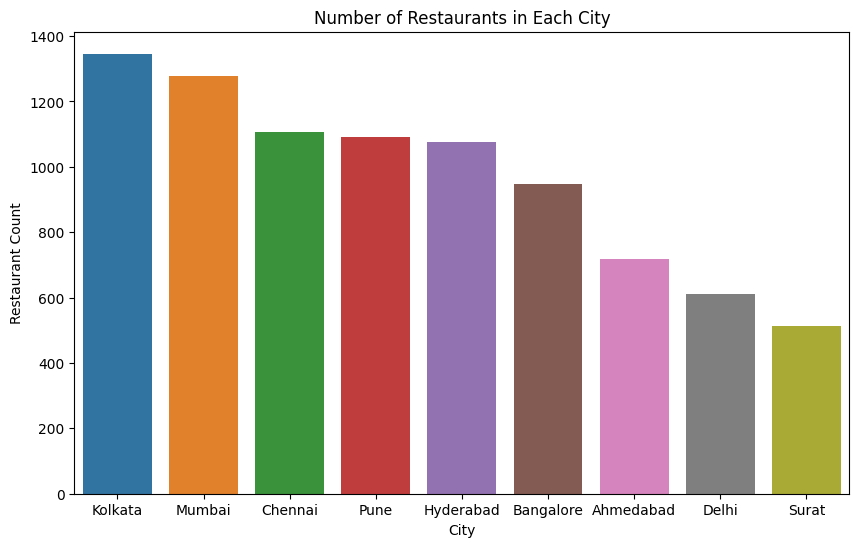

The city with the highest number of restaurants is Kolkata with 1346 restaurants.
The city with the least number of restaurants is Surat with 512 restaurants.


In [40]:
# Count the number of restaurants in each city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Restaurant Count']

# Sort the cities by restaurant count in descending order
city_counts = city_counts.sort_values(by='Restaurant Count', ascending=False)


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=city_counts, x='City', y='Restaurant Count')
plt.title("Number of Restaurants in Each City")
plt.xlabel("City")
plt.ylabel("Restaurant Count")

plt.show()

# City with the highest number of restaurants
max_city = city_counts.iloc[0]
print(f"The city with the highest number of restaurants is {max_city['City']} with {max_city['Restaurant Count']} restaurants.")

# City with the least number of restaurants
min_city = city_counts.iloc[-1]
print(f"The city with the least number of restaurants is {min_city['City']} with {min_city['Restaurant Count']} restaurants.")

##Insight

The city with the highest number of restaurants is Kolkata with 1346 restaurants.

The city with the least number of restaurants is Surat with 512 restaurants.

2. Display the frequency of average rating appropriate chart



In [41]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Number of Food Types
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,4
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,2
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,1
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,4
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,8


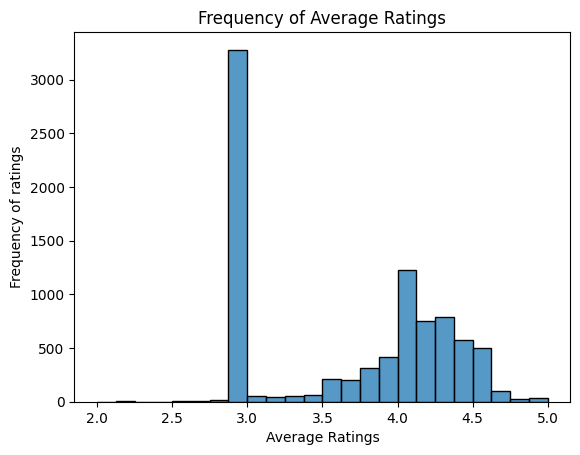

In [42]:
sns.histplot(data= df, x=df['Avg ratings'])
plt.xlabel("Average Ratings")
plt.ylabel("Frequency of ratings")
plt.title("Frequency of Average Ratings")
plt.show()

3. What is the top 10 ordered food type in Swiggy

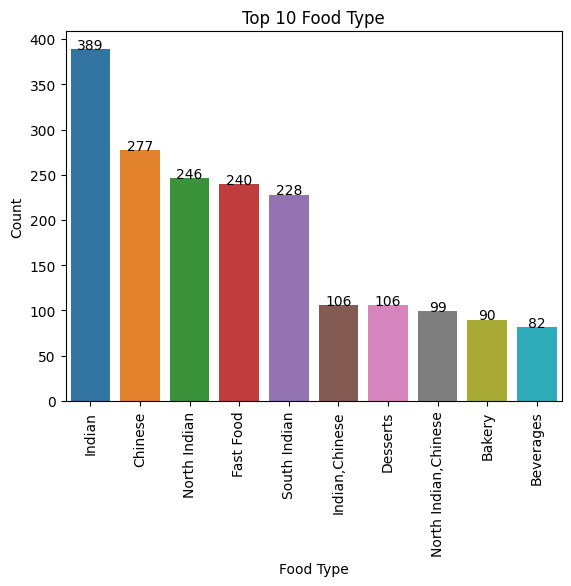

In [43]:
food= df['Food type'].value_counts().head(10)
sns.barplot(data=df, x= food.index, y=food.values)
for i,v in enumerate(food.values):
    plt.text(i,v+.25,str(v),ha='center')
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.title("Top 10 Food Type")
plt.xticks(rotation="vertical")
plt.show()

##Insight

Indian food types has the most number of orders in swiggy and beverages has the least



4.Which are the top 10 restaurants with fast delivery in Bangalore city.


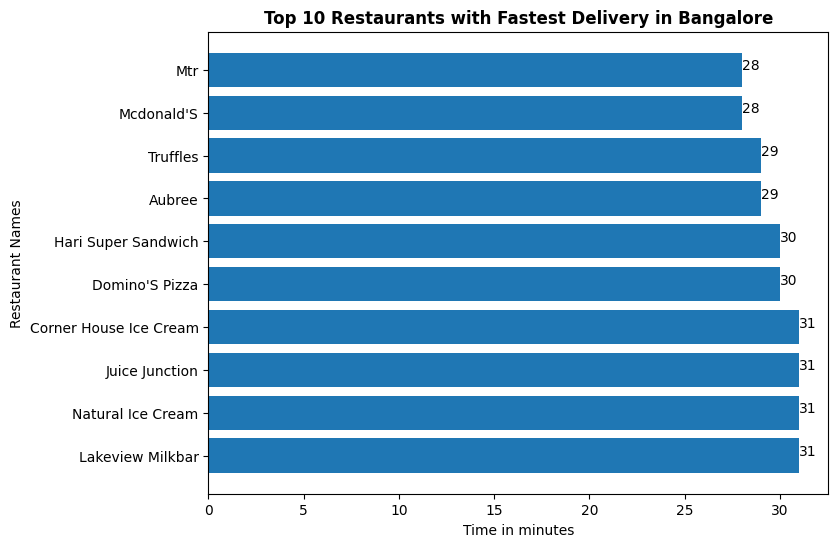

In [44]:
a = df.City == 'Bangalore'
b = df[a]
c =b.sort_values('Delivery time').head(10)

plt.figure(figsize=(8,6))
plt.barh(c.Restaurant[::-1],c['Delivery time'][::-1])
for i,v in enumerate(c['Delivery time'][::-1]):
    plt.text(v,i,str(v))

plt.title('Top 10 Restaurants with Fastest Delivery in Bangalore',fontdict={'fontweight':'bold'})
plt.xlabel('Time in minutes')
plt.ylabel('Restaurant Names')
plt.show()

Mtr and Mcdonald's are the restaurant with fastest delivery time in Bangalore.

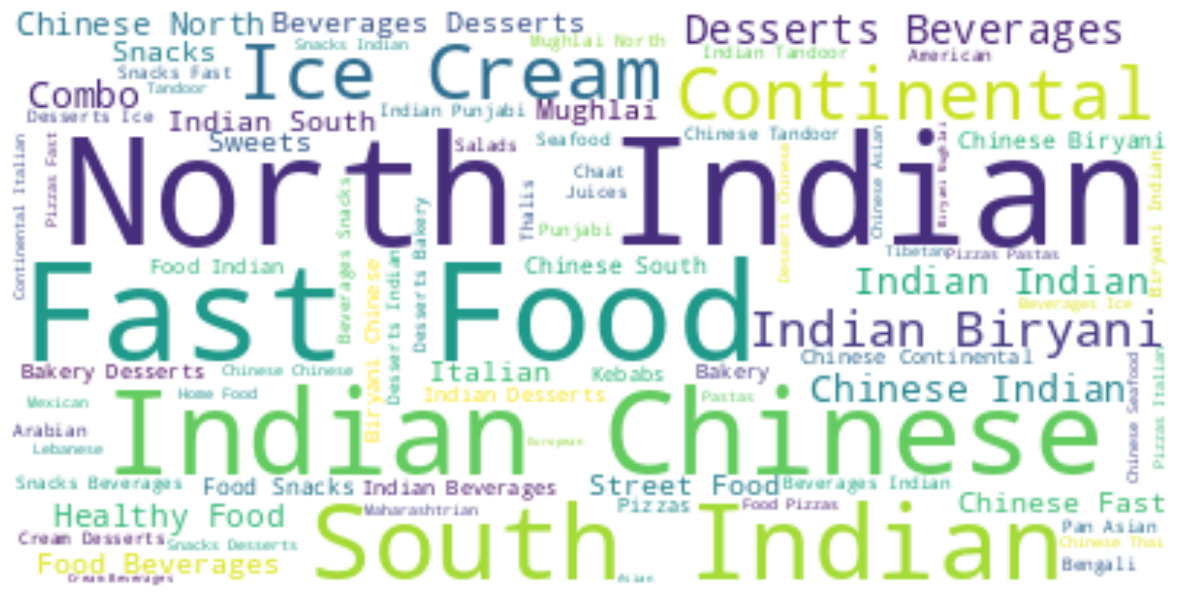

In [46]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
df_reName = df.rename(columns = {'Food type': 'Food_Type'}, inplace = False)
text = " ".join(i for i in df_reName.Food_Type)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()